# Author : DEEPAK WADGE

# Task 1 - Iris Flowers Classification ML Project


# Importing Librarires

In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns

# Importing a dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
data = read_csv(url, names=names)

In [3]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
data.describe() 

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print(data.groupby('species').size())  # class distribution

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


To visualize the whole dataset we used the seaborn pair plot method. 
It plots the whole dataset’s information.

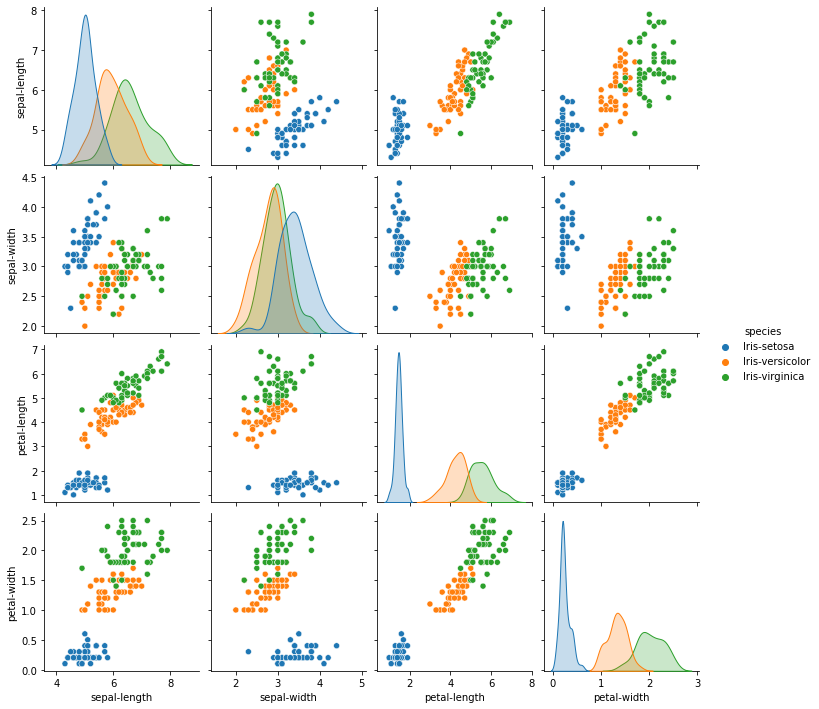

In [8]:
# Visualize the whole dataset
sns.pairplot(data, hue='species')

# Data Visualization

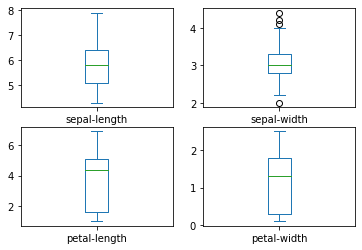

In [9]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()  # box and whisker plots

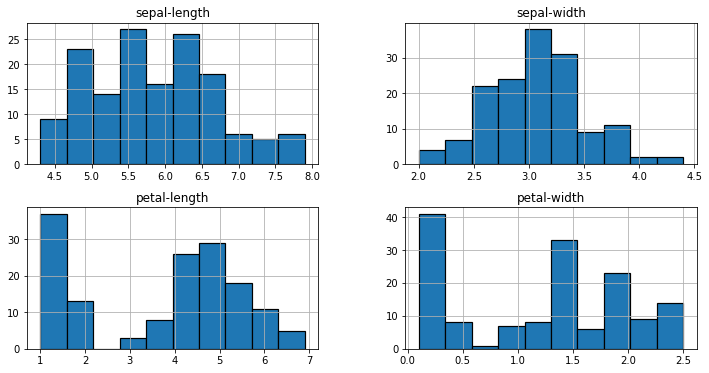

In [10]:
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

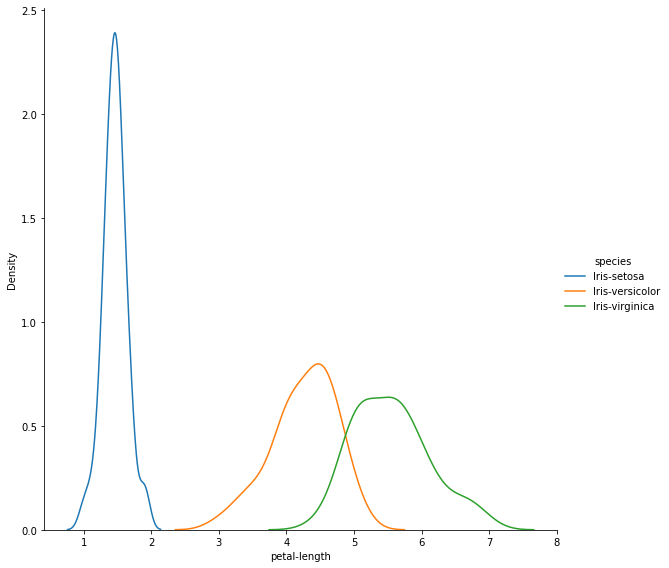

In [11]:
# A useful seaborn plot for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(data, hue="species", height=8) \
   .map(sns.kdeplot, "petal-length") \
   .add_legend()

## Heatmap

### Plotting the heatmap to check the correlation.

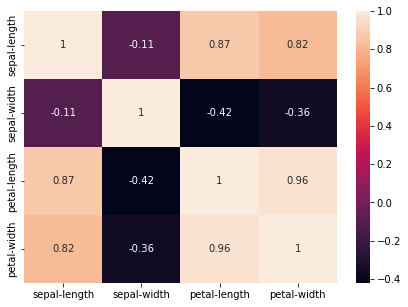

In [12]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

Observation---> The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated We will use all the features for training the algorithm and check the accuracy

Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.

Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

# Splitting The Data into Training And Testing Dataset

In [13]:
train, test = train_test_split(data, test_size=0.2) # our main data split into train and test
# the attribute test_size=0.3
#splits the data into 70% and 30% ratio. 
#train=70% and test=30%
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [14]:
train_X = train[['sepal-length','sepal-width','petal-length','petal-width']]       # taking the training data features
train_y = train.species        # output of the training data

test_X = test[['sepal-length','sepal-width','petal-length','petal-width']]     # taking test data feature
test_y = test.species          # output value of the test data

In [15]:
train_X.head()

,sepal-length,sepal-width,petal-length,petal-width
17,5.1,3.5,1.4,0.3
9,4.9,3.1,1.5,0.1
15,5.7,4.4,1.5,0.4
115,6.4,3.2,5.3,2.3
12,4.8,3.0,1.4,0.1


In [16]:
test_X.head()

,sepal-length,sepal-width,petal-length,petal-width
84,5.4,3.0,4.5,1.5
82,5.8,2.7,3.9,1.2
120,6.9,3.2,5.7,2.3
0,5.1,3.5,1.4,0.2
61,5.9,3.0,4.2,1.5


In [17]:
train_y.head()

17        Iris-setosa
9         Iris-setosa
15        Iris-setosa
115    Iris-virginica
12        Iris-setosa
Name: species, dtype: object

## Normalization/Standardization of Data

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
Standard_obj = StandardScaler()
Standard_obj.fit(train_X)
x_train_std = Standard_obj.transform(train_X)
x_test_std = Standard_obj.transform(test_X)

### Support Vector Machine SVM

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_std, train_y)
print('Training data accuracy {:.2f}'.format(svm.score(x_train_std, train_y)*100))
print('Testing data accuracy {:.2f}'.format(svm.score(x_test_std, test_y)*100))

Training data accuracy 97.50
Testing data accuracy 100.00


On successful execution, the classifier gave a training and testing accuracy of about 97% and 93% respectively which is pretty decent.

SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

### Decision Tree Classifier

In [20]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train_std, train_y)
print('Training data accuracy {:.2f}'.format(decision_tree.score(x_train_std, train_y)*100))
print('Testing data accuracy {:.2f}'.format(decision_tree.score(x_test_std, test_y)*100))

Training data accuracy 100.00
Testing data accuracy 100.00


### Logistic Rgression

In [21]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y)*100)

The accuracy of Logistic Regression is:  100.0
